In [2]:
import module1 as m1
import urllib.request
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url ='https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/ice_cream2.txt'

In [4]:
urllib.request.urlretrieve(url, 'ice_cream2.txt')
col1 = []
col2 = []
col3 = []
for i, line in enumerate(open('ice_cream2.txt', encoding='utf-8')):
    if i == 0:
        continue
    c = line.split()
    col1.append(int(c[0])) 
    col2.append(int(c[1]))
    col3.append(int(c[2]))

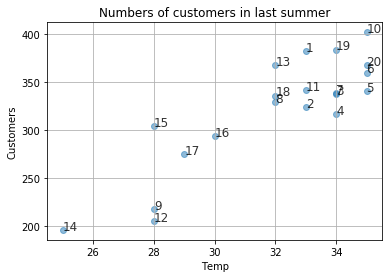

In [5]:
plt.scatter(col2, col3, alpha=0.5)
plt.title("Numbers of customers in last summer")
plt.xlabel("Temp")
plt.ylabel("Customers")
for shop, x, y in zip(col1, col2, col3):
    plt.text(x, y, shop, alpha=0.8, size=12)
plt.grid()
plt.show()

In [6]:
m1.correlation(col2, col3)

0.8704

In [7]:
# 回帰直線の傾き＝相関係数＊（（yの標準偏差）／（xの標準偏差））
def a_fit(xlist, ylist):
    c = m1.correlation(xlist, ylist)
    return (c * (m1.standard_deviation(ylist)/m1.standard_deviation(xlist)))

In [8]:
# y切片＝yの平均－（傾き＊xの平均）
def b_fit(xlist, ylist):
    r = m1.average(ylist) - (a_fit(xlist, ylist) * m1.average(xlist))
    return r

In [9]:
print("y = ax + b; (a, b) = ({0}, {1})".format(round((a_fit(col2, col3)),3), round((b_fit(col2, col3)),3)))

y = ax + b; (a, b) = (17.249, -230.012)


In [10]:
# たとえば最高気温 31度のときの予測客数は
a_fit(col2, col3) * 31 + b_fit(col2, col3)

304.71324980681436

In [11]:
# 回帰直線を描くための準備として、回帰直線の式を参考に、xの最小値〜最大値の範囲のxに対応するyの予測値（fitted_y）を計算してください。
test_x = []
fitted_y = []
for x in range(min(col2), max(col2)+1):
    test_x.append(x)
    fitted_y.append(a_fit(col2, col3) * x + b_fit(col2,col3))

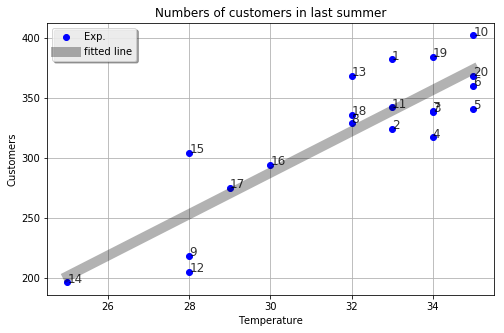

In [12]:
plt.figure(figsize=(8,5))
plt.plot(col2,col3,'bo', label='Exp.')
plt.plot(test_x,fitted_y,'k-', label='fitted line', linewidth=10, alpha=0.3)
plt.title("Numbers of customers in last summer")
plt.xlabel("Temperature")
plt.ylabel("Customers")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
for day, x, y in zip(col1, col2, col3):
    plt.text(x, y, day, alpha=0.8, size=12)
plt.show()


In [13]:
#課題4.5
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/shop_distance.txt'
urllib.request.urlretrieve(url, 'ice_cream3.txt')

('ice_cream3.txt', <http.client.HTTPMessage at 0x1f64bce69e8>)

In [15]:
c1 = []
c2 = []
c3 = []
for i, line in enumerate(open('ice_cream3.txt', encoding='utf-8')):
    if i == 0:
        continue
    c = line.split()
    c1.append(int(c[0])) 
    c2.append(int(c[1]))
    c3.append(int(c[2]))

In [16]:
# 相関係数
m1.correlation(c2, c3)

-0.9795

In [17]:
# 回帰直線の式
print("y = ax + b; (a, b) = ({0}, {1})".format(round((a_fit(c2, c3)),3), round((b_fit(c2, c3)),3)))

y = ax + b; (a, b) = (-0.476, 755.345)


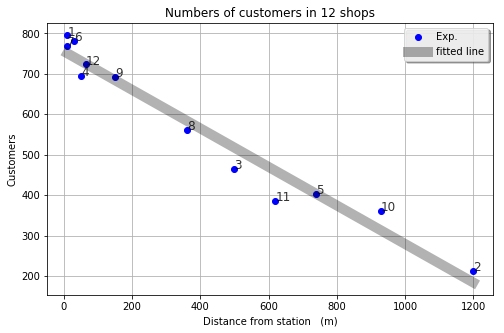

In [20]:
# 散布図と回帰直線。
t_x = []
f_y = []
for x in range(min(c2), max(c2)+1):
    t_x.append(x)
    f_y.append(a_fit(c2, c3) * x + b_fit(c2,c3))
    
plt.figure(figsize=(8,5))
plt.plot(c2,c3,'bo', label='Exp.')
plt.plot(t_x,f_y,'k-', label='fitted line', linewidth=10, alpha=0.3)
plt.title("Numbers of customers in 12 shops")
plt.xlabel("Distance from station   (m)")
plt.ylabel("Customers")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
for num, x, y in zip(c1, c2, c3):
    plt.text(x, y, num, alpha=0.8, size=12)
plt.show()